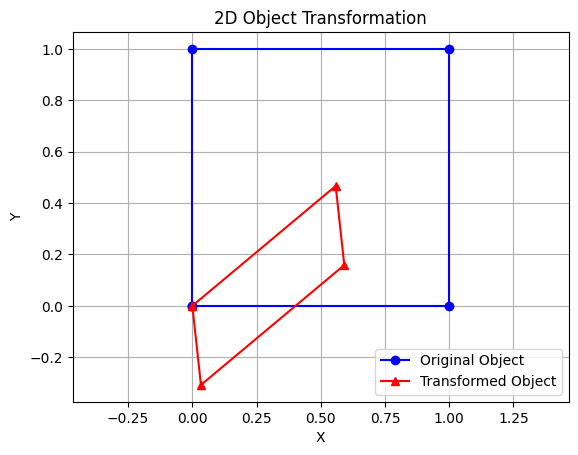

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def translation(tx, ty):
    return np.array([
        [1, 0, tx],
        [0, 1, ty],
        [0, 0, 1]
    ])

def rotation(theta):
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)
    return np.array([
        [cos_theta, -sin_theta, 0],
        [sin_theta, cos_theta, 0],
        [0, 0, 1]
    ])

def scaling(sx, sy):
    return np.array([
        [sx, 0, 0],
        [0, sy, 0],
        [0, 0, 1]
    ])

def shear(shx, shy):
    return np.array([
        [1, shx, 0],
        [shy, 1, 0],
        [0, 0, 1]
    ])

def apply_transform(points, transformation):
    homogeneous_points = np.column_stack((points, np.ones(len(points))))
    transformed_points = np.dot(homogeneous_points, transformation)
    return transformed_points[:, :-1]

#Example usage
# Define original points of the object
points = np.array([
    [0, 0],
    [1, 0],
    [1, 1],
    [0, 1],
    [0, 0]
])

# Apply transformations
tx, ty = 3, 2  # Translation values
theta = np.pi/3  # Rotation angle (in radians)
sx, sy = 0.5, 0.5  # Scaling factors
shx, shy = 0.5, 0.5  # Shear factors

translation_matrix = translation(tx, ty)
rotation_matrix = rotation(theta)
scaling_matrix = scaling(sx, sy)
shear_matrix = shear(shx, shy)

# Apply transformations one by one
translated_points = apply_transform(points, translation_matrix)
rotated_points = apply_transform(translated_points, rotation_matrix)
scaled_points = apply_transform(rotated_points, scaling_matrix)
sheared_points = apply_transform(scaled_points, shear_matrix)

# Plot original and transformed object
plt.plot(points[:, 0], points[:, 1], 'bo-', label='Original Object')
plt.plot(sheared_points[:, 0], sheared_points[:, 1], 'r^-', label='Transformed Object')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('2D Object Transformation')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()